In [1]:
import os
import utils
import selfies as sf
import utils
from openbabel import openbabel as ob
from openbabel import pybel as pb
from rdkit import Chem
from rdkit.Chem import AllChem
import mcsa
from vina import Vina
import importlib

importlib.reload(mcsa)

<module 'mcsa' from '/home/red_fleet/cb/denovo_all/LigGen/mcsa.py'>

In [71]:
import generate_ligands as GL

In [29]:
def read_smiles(smiles_path):
    with open(smiles_path, 'r') as f:
        frags = f.read().split("\n")
        frags = [f.split()[0] for f in frags if f != '']
        return frags

def clean_smiles(smiles_list):
    # removing disconnected smiles
    smiles_list = [smiles for smiles in smiles_list if '.' not in smiles]
    return smiles_list

def remove_stereo_symbols(smiles_list):
    smiles_list = [smile.replace("\\", "").replace("/", "") for smile in smiles_list]

    return smiles_list

In [3]:
def _pipeline(fragments:list[str], target_path, initial_point, grid_center, 
             grid_size, initial_ligand:str=None, chain_extend_probablity=0.2, weight=500, 
             max_iter=100, temp=300, score=0, vina_weight=0.5, alpha=0.9, dock=True):

    vina = Vina(cpu=1)
    sa = mcsa.SimulatedAnnealing(fragments=fragments, vina=vina)
    # setting target and computing grid box
    sa.setTarget(target_pdbqt_path=target_path, grid_param=(None, grid_center, grid_size))

    result = sa.simulatedAnnealing(
            max_mw=weight,
            temp = temp,
            initial_building_position=initial_point,
            start_score=score,
            end_prob=chain_extend_probablity,
            vina_score_weight=vina_weight,
            ligand=initial_ligand,
            max_iter_at_state=max_iter,
            alpha=alpha
        )
        
    return result
        

            

In [50]:
smiles = remove_stereo_symbols(clean_smiles(read_smiles("frags/ligbuilder_frags.smiles")))


In [5]:
size = [30, 30, 30]
center = [-4.417,-4.0435,30.651]
pdb_path = "in_files/2g94/2g94.pdbqt"


In [27]:
import os
import utils
import selfies as sf
import utils
from openbabel import openbabel as ob
from openbabel import pybel as pb
from rdkit import Chem
from rdkit.Chem import AllChem
import mcsa
from vina import Vina
import importlib

importlib.reload(mcsa)

<module 'mcsa' from '/home/red_fleet/cb/denovo_all/LigGen/mcsa.py'>

In [63]:
x = _pipeline(fragments =smiles, target_path=pdb_path, initial_point=center, grid_center=center, 
             grid_size=size, initial_ligand="", chain_extend_probablity=0.2, weight=500, 
             max_iter=100, temp=20, score=0, vina_weight=0.5, alpha=0.2, dock=True)

Computing Vina grid ... done.
Performing local search ... done updating
done.
-5.1400385720107655
Performing local search ... done.
done updating
-0.3624294964410213
Performing local search ... done.
done updating
0.26570068956259973


[10:58:52] UFFTYPER: Unrecognized charge state for atom: 5
[10:58:52] UFFTYPER: Unrecognized charge state for atom: 5


done updating
Performing local search ... done.
0.11324311741291293
Performing local search ... done.
done updating
0.18805837968087769


[10:58:52] Explicit valence for atom # 14 O, 3, is greater than permitted
[10:58:52] Explicit valence for atom # 2 N, 4, is greater than permitted
[10:58:52] UFFTYPER: Unrecognized charge state for atom: 5
[10:58:53] Explicit valence for atom # 13 Br, 2, is greater than permitted
[10:58:53] UFFTYPER: Unrecognized charge state for atom: 5


Performing local search ... done updating
0.052441156599481786
done.


[10:58:53] UFFTYPER: Unrecognized charge state for atom: 5


Performing local search ... done updating
-0.19200929445145398
done.


[10:58:53] Explicit valence for atom # 17 O, 3, is greater than permitted
[10:58:53] UFFTYPER: Unrecognized charge state for atom: 5


Performing local search ... done updating
-0.5183307275828
done.


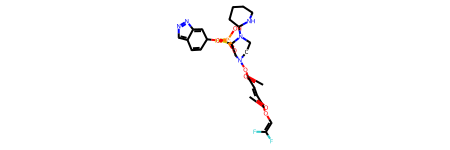

In [64]:
x[0]

In [65]:
x[1]

{'total_frag_screened': 12,
 'total_frag_rejected_mpc': 2,
 'state_details': [{'out_pdbqt': 'ROOT\nREMARK  Name = \nREMARK                            x       y       z     vdW  Elec       q    Type\nREMARK                         _______ _______ _______ _____ _____    ______ ____\nATOM      1  N   UNL     1      -4.150  -4.036  30.532  0.00  0.00    -0.316 NA\nATOM      2  C   UNL     1      -2.788  -3.747  30.152  0.00  0.00    +0.081 C \nATOM      3  C   UNL     1      -2.201  -5.007  29.563  0.00  0.00    +0.015 C \nATOM      4  C   UNL     1      -2.069  -6.012  30.675  0.00  0.00    +0.002 C \nATOM      5  C   UNL     1      -3.411  -6.251  31.310  0.00  0.00    +0.015 C \nATOM      6  C   UNL     1      -4.137  -4.967  31.615  0.00  0.00    +0.081 C \nATOM      7  H   UNL     1      -4.649  -4.439  29.739  0.00  0.00    +0.122 HD\n\nENDROOT\nTORSDOF 0',
   'out_sdf': '\n     RDKit          3D\n\n  6  6  0  0  0  0  0  0  0  0999 V2000\n   -4.1500   -4.0360   30.5320 N   0  0  0  

In [67]:
print(x[1]['state_details'][-1]['out_sdf'])


     RDKit          3D

 38 41  0  0  0  0  0  0  0  0999 V2000
    3.0470   -2.4310   25.4820 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.8320   -3.1210   25.7880 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.0530   -4.2740   26.6610 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.9560   -5.1700   26.7240 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3250   -4.7740   27.9030 S   0  0  0  0  0  4  0  0  0  0  0  0
    0.4900   -4.6850   29.6540 P   0  0  0  0  0  6  0  0  0  0  0  0
    1.3200   -5.9510   29.6960 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.6760   -4.7500   30.8560 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.9760   -4.6110   30.3840 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5640   -3.4110   31.0240 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6440   -3.4330   31.7860 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3150   -4.6940   32.0250 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3630   -4.4230   32.8190 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3700   -3.0390   33

In [42]:
Chem.MolFromSmiles("O(C(=O)/C(=C(/C(=C))\)/)")

[22:23:27] SMILES Parse Error: syntax error while parsing: O(C(=O)/C(=C(/C(=C))\)/)
[22:23:27] SMILES Parse Error: Failed parsing SMILES 'O(C(=O)/C(=C(/C(=C))\)/)' for input: 'O(C(=O)/C(=C(/C(=C))\)/)'


In [11]:
smiles

['C1(C(C(N(C(C1))C(=O)O)))',
 'O(S(=O)(=O))',
 'O1C(Oc2c1c(c1c(c2)C([C@]2(C(OC(=O)[C@@]2(C1))))))',
 '[N+]1(C(C(C(C(C1)))))',
 'O(P(=O)(N)N)',
 'C(=C(C#C/C(=C(/C(=C))\\)/))',
 '[nH]1c(c(c(=O)[nH]c1=O))',
 'S=C(N(N(C(=S)N)))N',
 'N(c1nc(nc(n1)N)N)',
 'C1(=NC(C(N1)))',
 'N1(C(C(=O)N2[C@@](C(C(C2)))(C(=O)N(C(C(C(C(C(=O)N(C(C(=O)N2[C@@](C(C(C2)))(C(=O)N(C(C1=O)))))))))))))',
 'N12[C@@](C(C(C2)))(C(=O)N(C(C(C(C(C(=O)N(C(C(=O)N2[C@@](C(C(C2)))(C(=O)N(C(C(=O)N(C(C1=O)))))))))))))',
 'O(c1c(c(c(c(c1))C(=O)))O)',
 'N(C(=O)N(/C(=N/)/N))',
 '[N+]1(C(C([C@@]2(C([C@]1(C(c1c2c(c(c(c1))O))))))))',
 'N1(C(N(C(C(C1)))))',
 'S(=O)(=O)(N)',
 'O(c1c(c(c(c(c1))Cl)))',
 'C(=O)',
 'c1c(c(c(c(c1))O)C(=O)N)',
 'C1(OC(C(=C(C1))))',
 'c1c(c2c(c(c1))C(=O)N(C2))',
 'c12c(c(c(c(c2)))O)C(C(C(C1)))',
 'N1(C(C(N(C(C1)))))',
 'O(c1c(nc(c(c1))))',
 'S(=O)(=O)(N(/C(=N/)/N))',
 'N(N(C(=O)))',
 'N(C(=O)C(=O)O)',
 'N1C(C(N(C(C1))c1c(c(c(c(c1))))O))',
 'S1[C@]2(N(C(=C1))C(C2))',
 'C1([C@]2(C(C([C@]3([C@@](C(C(c4c3c(c(c(c4)O)